<a href="https://colab.research.google.com/github/rkpe/DS4002-projects/blob/main/DSCapstone_Project1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Presentation Link: https://docs.google.com/presentation/d/1B1rtYeTDv2mCkWU8uOsU90Fqt8rm2n7GweVBTPeUfw8/edit?usp=sharing

# **Importing Libraries**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
def loadData(filename):
  data = pd.read_csv(filename)
  return data

# **Background**

***Problem***

*   Global Food Crisis
> *   According to the World Food Programme (WFP), more than *48 million people* are facing emergency levels of hunger and are threatened with acute malnutrition, starvation, and even death
>> *  The United Nations reported the need for a 60% increase in food production by *2050* if we hope to serve our growing population of 9.7 billion
> *   Global Warming has changed temperature and rainfall patterns, affecting soil conditions, which has resulted in unpredictable crop yield

***Solution***


*   Precision Agriculture
> *   Ariel imagery and AI image identification to monitor and manage fields
> *   Crop monitors to efficiently use input resources
> *   Soil monitors identifying best crop recommendations




# **Merging Datasets**
---



**Dataset Source**

https://www.kaggle.com/datasets/anushkahedaoo/farming-factors?select=Crops.csv


### **Loading Crops Data**

In [ ]:
crop_data = loadData('Crops.csv')

### **Crop Selection Process**

In [ ]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    2484 non-null   int64  
 1   Year                                         2484 non-null   int64  
 2   State Code                                   2484 non-null   int64  
 3   State Name                                   2484 non-null   object 
 4   Dist Name                                    2484 non-null   object 
 5   RICE AREA (1000 ha)                          2484 non-null   float64
 6   RICE PRODUCTION (1000 tons)                  2484 non-null   float64
 7   RICE YIELD (Kg per ha)                       2484 non-null   float64
 8   WHEAT AREA (1000 ha)                         2484 non-null   float64
 9   WHEAT PRODUCTION (1000 tons)                 2484 non-null   float64
 10  

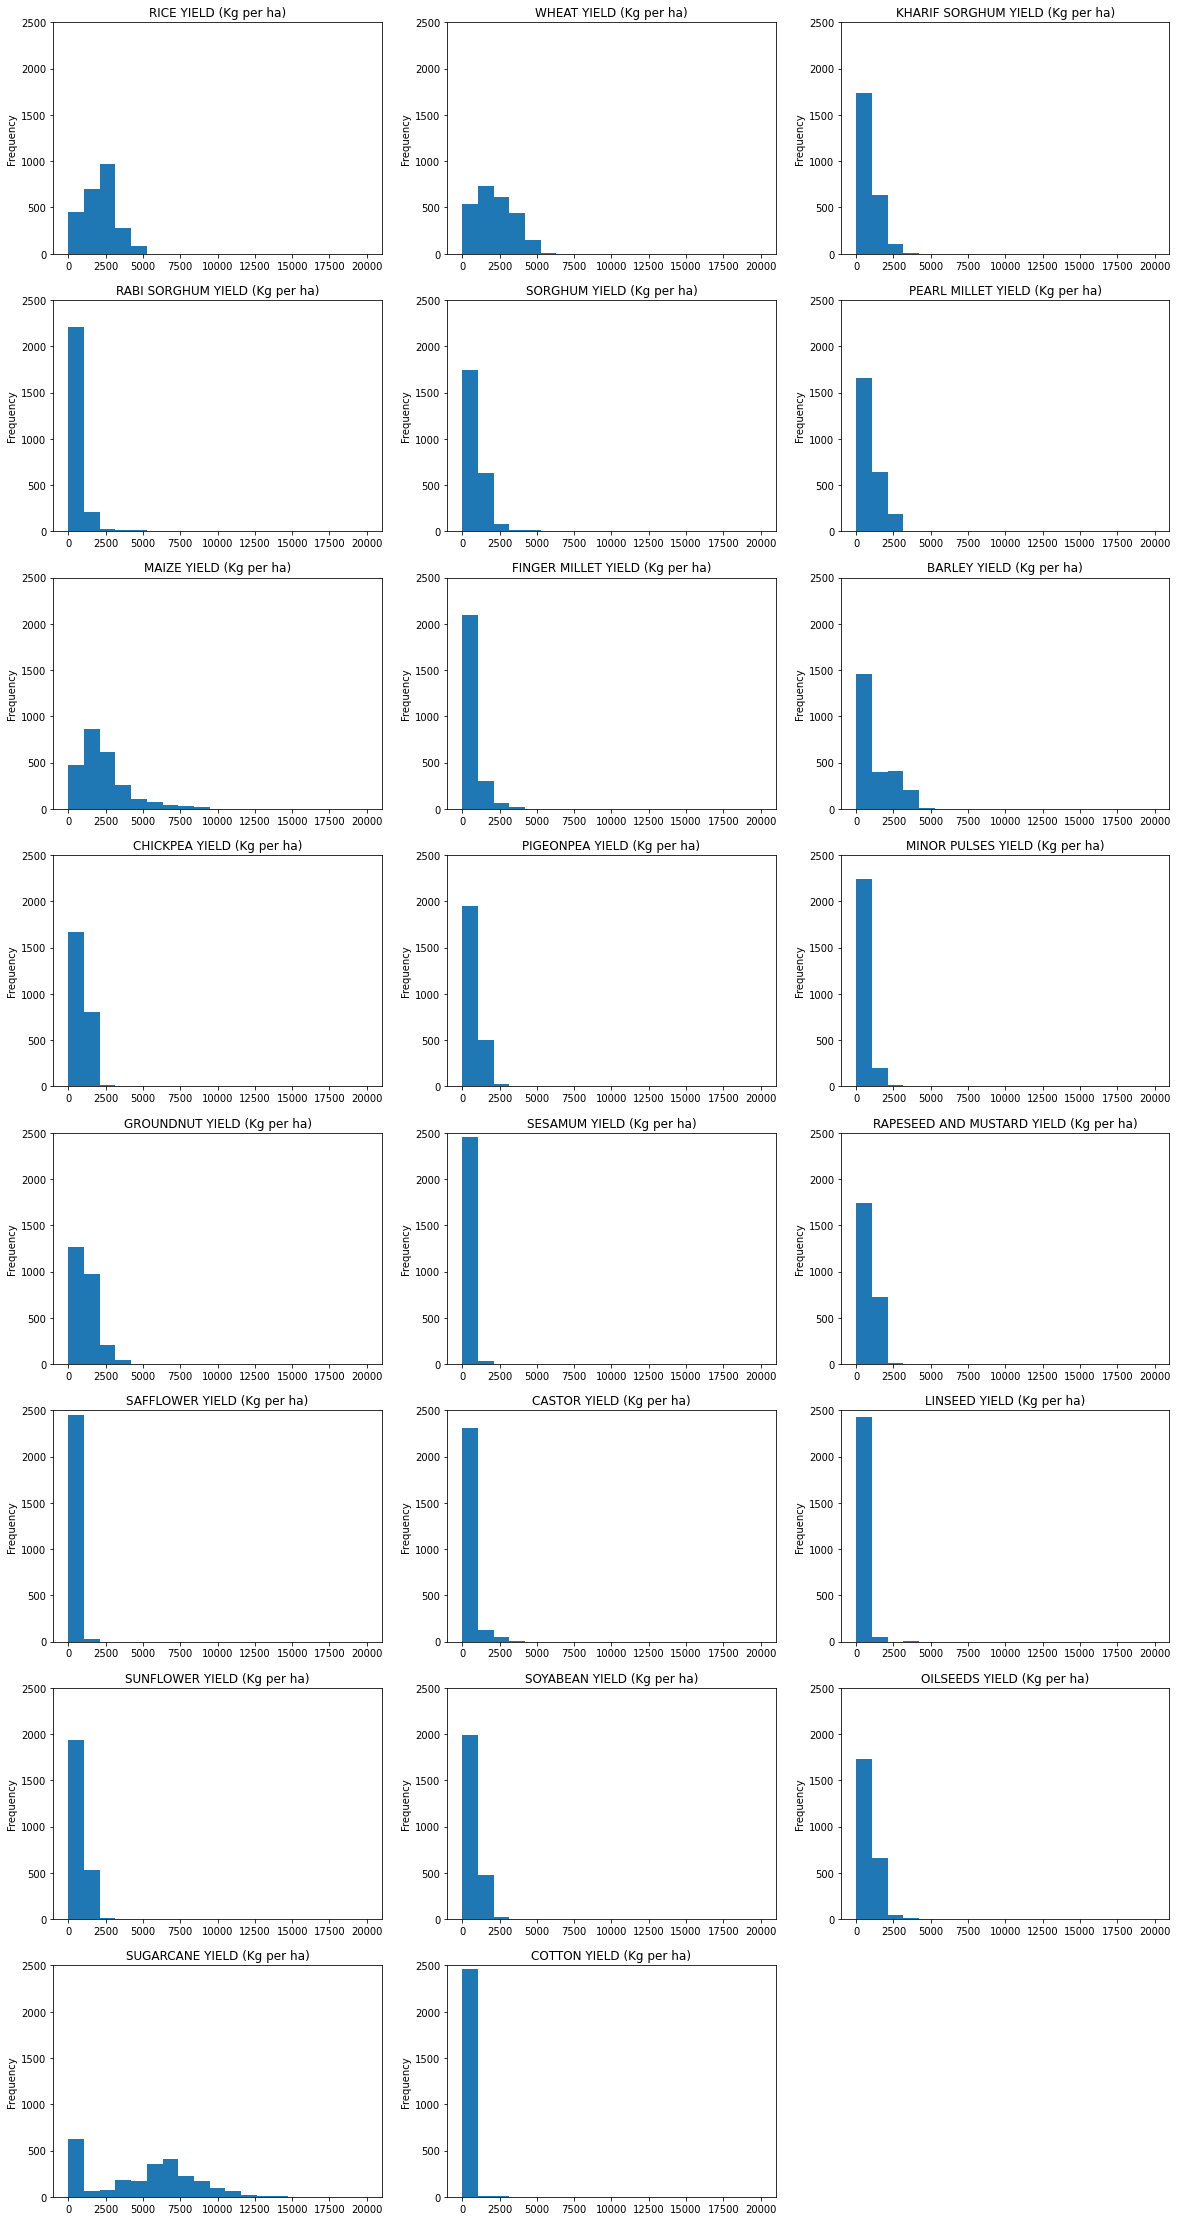

In [ ]:
count = 1
plt.figure(figsize=(20, 40))
for col_name in crop_data.columns:
  if "YIELD" in col_name: 
    # crop_data.hist(column=col_name, bins=20)
    plt.subplot(8, 3, count)
    plt.hist(crop_data[col_name], bins=np.linspace(0, 20000, 20))
    plt.ylim(0, 2500)
    plt.ylabel('Frequency')
    plt.title(col_name)
    count += 1
plt.show()

After analyzing the above crop yield histograms, we decided to include the following crops: Rice, Wheat, Maize, Sugarcane

In [ ]:
cols =  ['Dist Code', 'Year', 'State Code', 'State Name' , 'Dist Name', 'RICE YIELD (Kg per ha)', 'WHEAT YIELD (Kg per ha)', 'SUGARCANE YIELD (Kg per ha)','MAIZE YIELD (Kg per ha)']
crop = crop_data[cols]

### **Loading Fertilizer Data**

In [ ]:
fert = loadData('Fertilizer_Consumption.csv')

In [ ]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Dist Code                            2481 non-null   int64  
 1   Year                                 2481 non-null   int64  
 2   State Code                           2481 non-null   int64  
 3   State Name                           2481 non-null   object 
 4   Dist Name                            2481 non-null   object 
 5   NITROGEN CONSUMPTION (tons)          2481 non-null   float64
 6   NITROGEN SHARE IN NPK (Percent)      2481 non-null   float64
 7   NITROGEN PER HA OF NCA (Kg per ha)   2481 non-null   float64
 8   NITROGEN PER HA OF GCA (Kg per ha)   2481 non-null   float64
 9   PHOSPHATE CONSUMPTION (tons)         2481 non-null   float64
 10  PHOSPHATE SHARE IN NPK (Percent)     2481 non-null   float64
 11  PHOSPHATE PER HA OF NCA (Kg pe

In [ ]:
colsf = ['Dist Code', 'Year', 'NITROGEN SHARE IN NPK (Percent)', 'PHOSPHATE SHARE IN NPK (Percent)', 'POTASH SHARE IN NPK (Percent)']
fert = fert[colsf]

In [ ]:
curr = pd.merge(crop, fert, how = 'left', on=['Dist Code','Year'])

In [ ]:
np.where(curr.isnull() == True)

(array([752, 752, 752, 754, 754, 754, 755, 755, 755]),
 array([ 9, 10, 11,  9, 10, 11,  9, 10, 11]))

In [ ]:
curr.iloc[752] #useless rows, let's drop

Dist Code                                    95
Year                                       2010
State Code                                    7
State Name                          Maharashtra
Dist Name                                Bombay
RICE YIELD (Kg per ha)                      0.0
WHEAT YIELD (Kg per ha)                     0.0
SUGARCANE YIELD (Kg per ha)                 0.0
MAIZE YIELD (Kg per ha)                     0.0
NITROGEN SHARE IN NPK (Percent)             NaN
PHOSPHATE SHARE IN NPK (Percent)            NaN
POTASH SHARE IN NPK (Percent)               NaN
Name: 752, dtype: object

In [ ]:
curr  = curr.dropna()

In [ ]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481 entries, 0 to 2483
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Dist Code                         2481 non-null   int64  
 1   Year                              2481 non-null   int64  
 2   State Code                        2481 non-null   int64  
 3   State Name                        2481 non-null   object 
 4   Dist Name                         2481 non-null   object 
 5   RICE YIELD (Kg per ha)            2481 non-null   float64
 6   WHEAT YIELD (Kg per ha)           2481 non-null   float64
 7   SUGARCANE YIELD (Kg per ha)       2481 non-null   float64
 8   MAIZE YIELD (Kg per ha)           2481 non-null   float64
 9   NITROGEN SHARE IN NPK (Percent)   2481 non-null   float64
 10  PHOSPHATE SHARE IN NPK (Percent)  2481 non-null   float64
 11  POTASH SHARE IN NPK (Percent)     2481 non-null   float64
dtypes: flo

### **Loading Crop Growing Period Data**

In [ ]:
period = loadData('Crop_growing_period.csv')

In [ ]:
period = period[['Dist Code', 'LENGTH OF GROWING PERIOD DAYS (Number)']]

In [ ]:
period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Dist Code                               313 non-null    int64
 1   LENGTH OF GROWING PERIOD DAYS (Number)  313 non-null    int64
dtypes: int64(2)
memory usage: 5.0 KB


In [ ]:
curr = pd.merge(curr, period, how = 'left', on=['Dist Code'])
curr = curr.replace(-1, np.NaN)

In [ ]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481 entries, 0 to 2480
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Dist Code                               2481 non-null   int64  
 1   Year                                    2481 non-null   int64  
 2   State Code                              2481 non-null   int64  
 3   State Name                              2481 non-null   object 
 4   Dist Name                               2481 non-null   object 
 5   RICE YIELD (Kg per ha)                  2481 non-null   float64
 6   WHEAT YIELD (Kg per ha)                 2481 non-null   float64
 7   SUGARCANE YIELD (Kg per ha)             2481 non-null   float64
 8   MAIZE YIELD (Kg per ha)                 2481 non-null   float64
 9   NITROGEN SHARE IN NPK (Percent)         2481 non-null   float64
 10  PHOSPHATE SHARE IN NPK (Percent)        2481 non-null   floa

### **Loading Crop Land Use Data**

In [ ]:
land = loadData('LandUse.csv')

In [ ]:
land = land[['Dist Code','Year', 'TOTAL AREA (1000 ha)','GROSS CROPPED AREA (1000 ha)','CROPING INTENSITY (Percent)']]
#land = land[['Dist Code','Year','TOTAL AREA (1000 ha)','NET CROPPED AREA (1000 ha)', 'GROSS CROPPED AREA (1000 ha)','CROPING INTENSITY (Percent)']]
land = land.replace(-1,0) #looked at data, it should be 0

In [ ]:
land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Dist Code                     2381 non-null   int64  
 1   Year                          2381 non-null   int64  
 2   TOTAL AREA (1000 ha)          2381 non-null   float64
 3   GROSS CROPPED AREA (1000 ha)  2381 non-null   float64
 4   CROPING INTENSITY (Percent)   2381 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 93.1 KB


In [ ]:
curr = pd.merge(curr, land, how = 'left', on=['Dist Code', 'Year'])

In [ ]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481 entries, 0 to 2480
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Dist Code                               2481 non-null   int64  
 1   Year                                    2481 non-null   int64  
 2   State Code                              2481 non-null   int64  
 3   State Name                              2481 non-null   object 
 4   Dist Name                               2481 non-null   object 
 5   RICE YIELD (Kg per ha)                  2481 non-null   float64
 6   WHEAT YIELD (Kg per ha)                 2481 non-null   float64
 7   SUGARCANE YIELD (Kg per ha)             2481 non-null   float64
 8   MAIZE YIELD (Kg per ha)                 2481 non-null   float64
 9   NITROGEN SHARE IN NPK (Percent)         2481 non-null   float64
 10  PHOSPHATE SHARE IN NPK (Percent)        2481 non-null   floa

In [ ]:
#just missing some years (2017), so let's average
land_list = ['TOTAL AREA (1000 ha)', 'GROSS CROPPED AREA (1000 ha)','CROPING INTENSITY (Percent)']
# list = ['TOTAL AREA (1000 ha)','NET CROPPED AREA (1000 ha)', 'GROSS CROPPED AREA (1000 ha)','CROPING INTENSITY (Percent)']
for x in land_list:
    curr[x] = curr.groupby("Dist Code")[x].transform(
        lambda x: x.fillna(x.mean()))

In [ ]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481 entries, 0 to 2480
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Dist Code                               2481 non-null   int64  
 1   Year                                    2481 non-null   int64  
 2   State Code                              2481 non-null   int64  
 3   State Name                              2481 non-null   object 
 4   Dist Name                               2481 non-null   object 
 5   RICE YIELD (Kg per ha)                  2481 non-null   float64
 6   WHEAT YIELD (Kg per ha)                 2481 non-null   float64
 7   SUGARCANE YIELD (Kg per ha)             2481 non-null   float64
 8   MAIZE YIELD (Kg per ha)                 2481 non-null   float64
 9   NITROGEN SHARE IN NPK (Percent)         2481 non-null   float64
 10  PHOSPHATE SHARE IN NPK (Percent)        2481 non-null   floa

### **Loading Annual Rainfall Data**

In [ ]:
rain = loadData('Monthly_Rainfall.csv')

In [ ]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Dist Code                         1703 non-null   int64  
 1   Year                              1703 non-null   int64  
 2   State Code                        1703 non-null   int64  
 3   State Name                        1703 non-null   object 
 4   Dist Name                         1703 non-null   object 
 5   JANUARY RAINFALL (Millimeters)    1703 non-null   float64
 6   FEBRUARY RAINFALL (Millimeters)   1703 non-null   float64
 7   MARCH RAINFALL (Millimeters)      1703 non-null   float64
 8   APRIL RAINFALL (Millimeters)      1703 non-null   float64
 9   MAY RAINFALL (Millimeters)        1703 non-null   float64
 10  JUNE RAINFALL (Millimeters)       1703 non-null   float64
 11  JULY RAINFALL (Millimeters)       1703 non-null   float64
 12  AUGUST

In [ ]:
rain = rain[['Dist Code', 'Year', 'ANNUAL RAINFALL (Millimeters)']]

# **Final Merged Data**

---



In [ ]:
curr1 = pd.merge(curr, rain, how = 'left', on=['Dist Code', 'Year'])

In [ ]:
#missing 2016 and 2017 years so let's average
curr1['ANNUAL RAINFALL (Millimeters)'] = curr1.groupby("Dist Code")['ANNUAL RAINFALL (Millimeters)'].transform(
    lambda x: x.fillna(x.mean()))

In [ ]:
curr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481 entries, 0 to 2480
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Dist Code                               2481 non-null   int64  
 1   Year                                    2481 non-null   int64  
 2   State Code                              2481 non-null   int64  
 3   State Name                              2481 non-null   object 
 4   Dist Name                               2481 non-null   object 
 5   RICE YIELD (Kg per ha)                  2481 non-null   float64
 6   WHEAT YIELD (Kg per ha)                 2481 non-null   float64
 7   SUGARCANE YIELD (Kg per ha)             2481 non-null   float64
 8   MAIZE YIELD (Kg per ha)                 2481 non-null   float64
 9   NITROGEN SHARE IN NPK (Percent)         2481 non-null   float64
 10  PHOSPHATE SHARE IN NPK (Percent)        2481 non-null   floa

In [ ]:
merge_data = curr1.dropna()

In [ ]:
merge_data = merge_data.drop(['Dist Name', 'State Name'], axis="columns")

In [ ]:
# General Dataset Overview
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2480
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Dist Code                               2240 non-null   int64  
 1   Year                                    2240 non-null   int64  
 2   State Code                              2240 non-null   int64  
 3   RICE YIELD (Kg per ha)                  2240 non-null   float64
 4   WHEAT YIELD (Kg per ha)                 2240 non-null   float64
 5   SUGARCANE YIELD (Kg per ha)             2240 non-null   float64
 6   MAIZE YIELD (Kg per ha)                 2240 non-null   float64
 7   NITROGEN SHARE IN NPK (Percent)         2240 non-null   float64
 8   PHOSPHATE SHARE IN NPK (Percent)        2240 non-null   float64
 9   POTASH SHARE IN NPK (Percent)           2240 non-null   float64
 10  LENGTH OF GROWING PERIOD DAYS (Number)  2240 non-null   floa

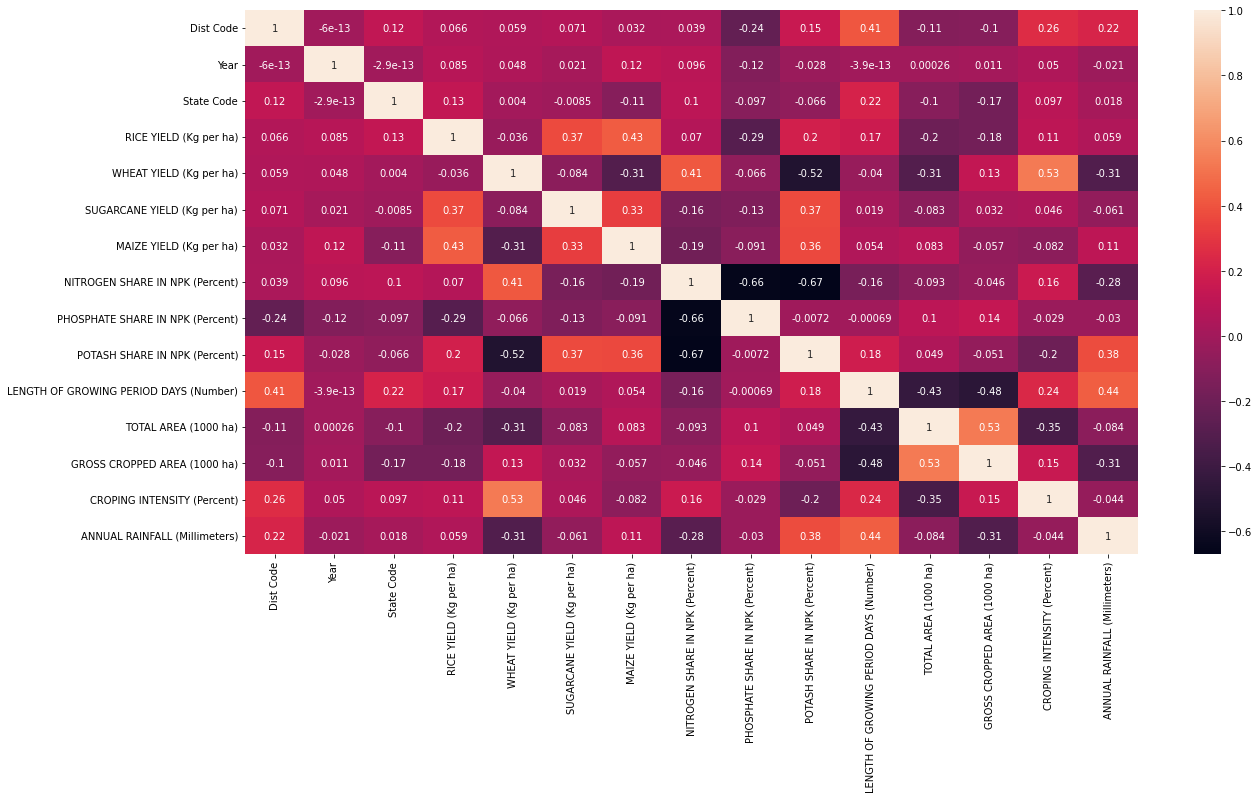

In [ ]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()

sns.heatmap(merge_data.corr(),annot=True, ax=ax)

In [ ]:
merge_data = merge_data.drop(columns=['SUGARCANE YIELD (Kg per ha)','MAIZE YIELD (Kg per ha)'])

id = ['Dist Code', 'NITROGEN SHARE IN NPK (Percent)', 'PHOSPHATE SHARE IN NPK (Percent)',
'POTASH SHARE IN NPK (Percent)','LENGTH OF GROWING PERIOD DAYS (Number)','TOTAL AREA (1000 ha)',
'GROSS CROPPED AREA (1000 ha)','CROPING INTENSITY (Percent)','ANNUAL RAINFALL (Millimeters)']

merge_data = pd.melt(merge_data, id_vars=id, value_vars=['RICE YIELD (Kg per ha)', 'WHEAT YIELD (Kg per ha)'])

In [ ]:
merge_data = merge_data.drop('Dist Code', axis="columns")

In [ ]:
merge_data.rename(columns = {'variable':'crop_name', 'value':'crop_yield'}, inplace = True)

In [ ]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NITROGEN SHARE IN NPK (Percent)         4480 non-null   float64
 1   PHOSPHATE SHARE IN NPK (Percent)        4480 non-null   float64
 2   POTASH SHARE IN NPK (Percent)           4480 non-null   float64
 3   LENGTH OF GROWING PERIOD DAYS (Number)  4480 non-null   float64
 4   TOTAL AREA (1000 ha)                    4480 non-null   float64
 5   GROSS CROPPED AREA (1000 ha)            4480 non-null   float64
 6   CROPING INTENSITY (Percent)             4480 non-null   float64
 7   ANNUAL RAINFALL (Millimeters)           4480 non-null   float64
 8   crop_name                               4480 non-null   object 
 9   crop_yield                              4480 non-null   float64
dtypes: float64(9), object(1)
memory usage: 350.1+ KB


In [ ]:
merge_data.head()

,NITROGEN SHARE IN NPK (Percent),PHOSPHATE SHARE IN NPK (Percent),POTASH SHARE IN NPK (Percent),LENGTH OF GROWING PERIOD DAYS (Number),TOTAL AREA (1000 ha),GROSS CROPPED AREA (1000 ha),CROPING INTENSITY (Percent),ANNUAL RAINFALL (Millimeters),crop_name,crop_yield
0,54.47,31.79,13.75,164.0,1988.17,1405.63,136.65,1149.7,RICE YIELD (Kg per ha),1695.77
1,53.56,33.69,12.75,164.0,1988.17,1409.94,136.83,1282.3,RICE YIELD (Kg per ha),1756.23
2,58.43,31.47,10.11,164.0,1988.17,1415.98,137.60,1092.1,RICE YIELD (Kg per ha),1900.97
3,58.05,30.36,11.59,164.0,1639.34,1431.30,138.89,1568.0,RICE YIELD (Kg per ha),1581.86
4,56.70,33.33,9.97,164.0,1640.28,1438.76,140.21,1379.7,RICE YIELD (Kg per ha),1729.89


In [ ]:
# Numerical Feature Statistics
merge_data.describe()

,NITROGEN SHARE IN NPK (Percent),PHOSPHATE SHARE IN NPK (Percent),POTASH SHARE IN NPK (Percent),LENGTH OF GROWING PERIOD DAYS (Number),TOTAL AREA (1000 ha),GROSS CROPPED AREA (1000 ha),CROPING INTENSITY (Percent),ANNUAL RAINFALL (Millimeters),crop_yield
count,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000
mean,64.692866,26.706527,8.467192,190.789286,949.376986,679.033364,146.006903,983.407857,2176.839324
std,10.746904,7.581212,7.407513,49.241755,586.393170,376.231012,29.359726,567.170432,1255.270684
min,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,56.750000,21.612500,2.650000,170.750000,540.850000,442.929286,123.937500,620.775000,1351.252500
50%,65.345000,26.040000,5.690000,194.000000,833.600000,628.135000,145.350000,872.850000,2239.595000
75%,72.952500,30.912500,12.902500,220.000000,1182.955000,848.327500,165.622500,1203.275000,3017.725000
max,94.700000,54.060000,45.180000,307.000000,4565.200000,2654.090000,258.540000,4471.000000,5653.830000


In [ ]:
merge_data.to_csv('cleaned_crop_data.csv')

# **ML Question**

---

How can we create a ML model that accurately predicts crop yield given a set of agricultural conditions? 

# **Data Visualization**

---



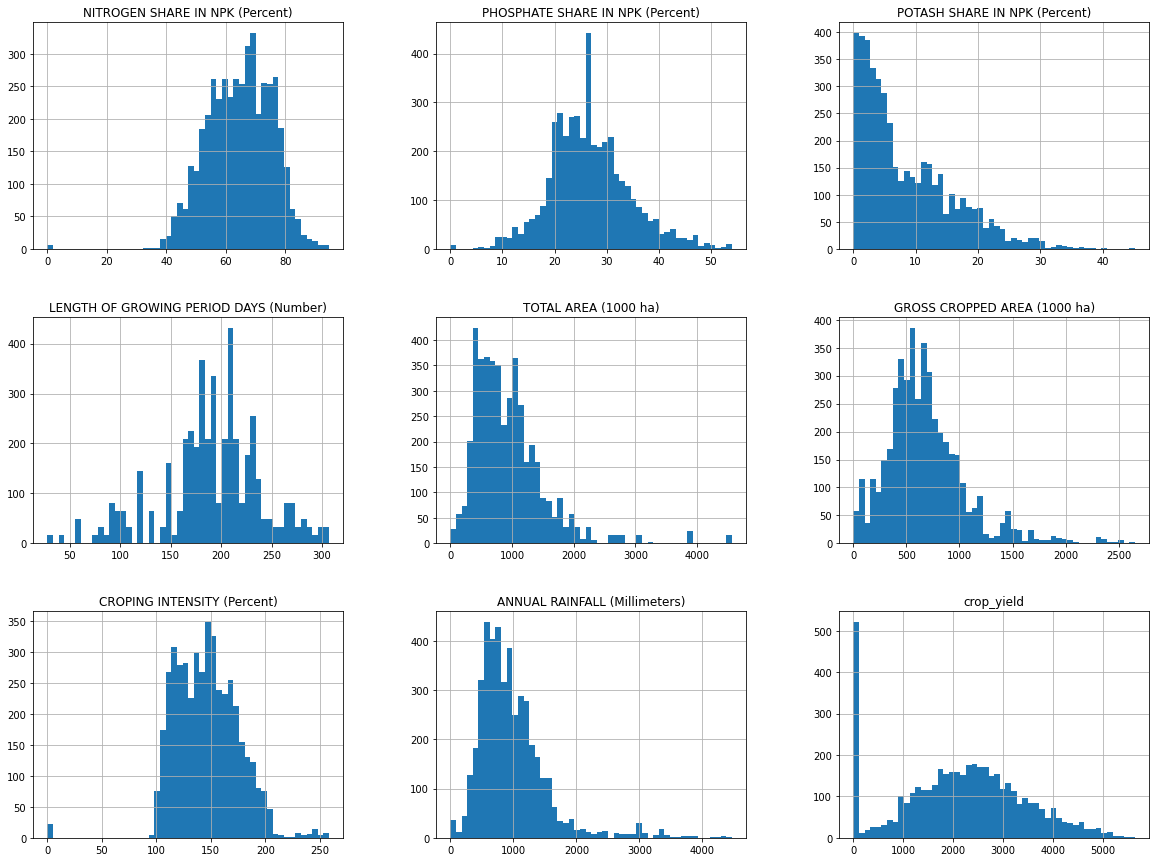

In [ ]:
# Histograms (Numerical Attributes)
merge_data.hist(bins=50, figsize=(20,15))
plt.show()

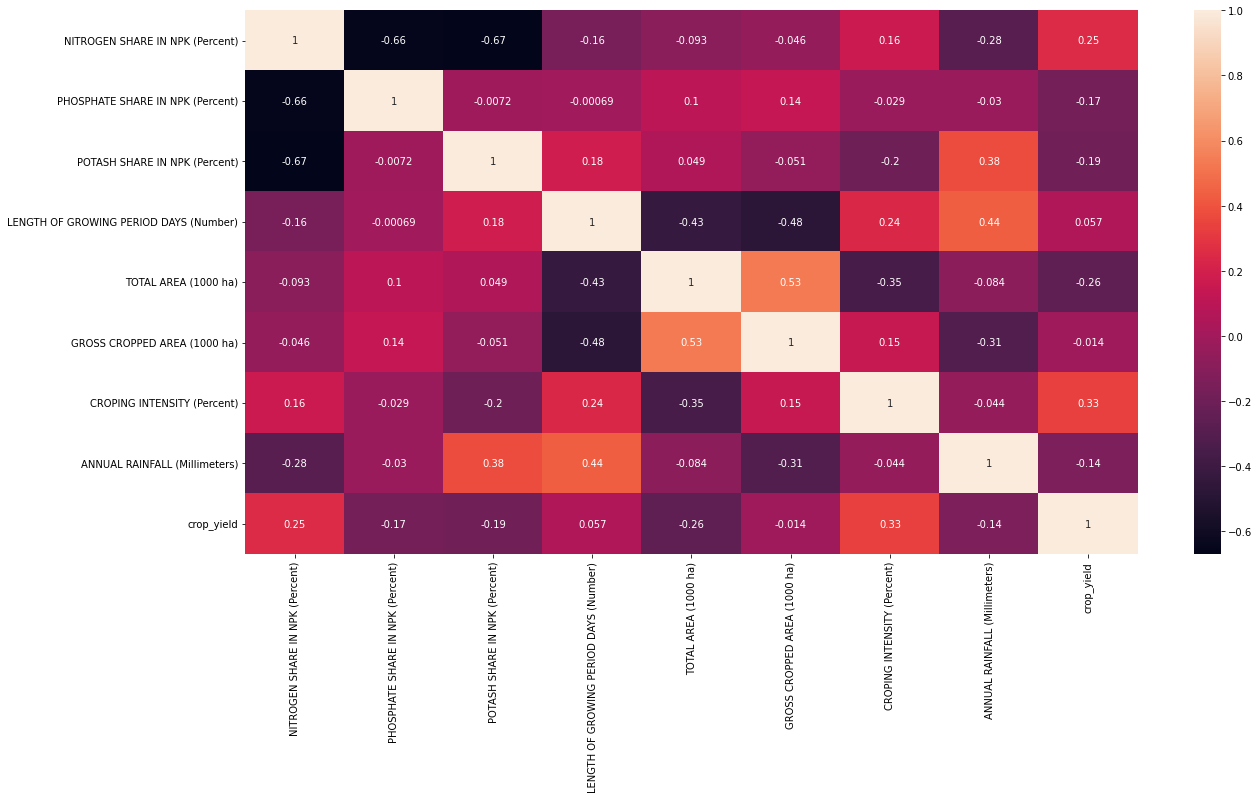

In [ ]:
# Correlation Matrix (Numerical Attributes)
plt.figure(figsize=(20, 10))
ax = plt.subplot()

sns.heatmap(merge_data.corr(),annot=True, ax=ax)

# **Creating Train & Test Sets**

---



In [ ]:
X = merge_data.drop(columns='crop_yield')
y = merge_data.crop_yield

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=merge_data['crop_name'], train_size=0.80, random_state=21)

### **Preprocessing Data**

In [ ]:
# Created separate pipelines for numerical and categorical variables for easier preprocessing
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse=False))
])

In [ ]:
# Merged pipelines so that it can be run on the entire dataset
# TODO: Add appropriate columns names into lists
# merge_data.loc[:, ~merge_data.columns.isin(["State Name", "Dist Name"])]

num_columns = X.select_dtypes(include=np.number).columns
cat_columns = ['crop_name']


full_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, num_columns),
    ('categorical', cat_pipeline, cat_columns)
])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3584 entries, 775 to 3134
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NITROGEN SHARE IN NPK (Percent)         3584 non-null   float64
 1   PHOSPHATE SHARE IN NPK (Percent)        3584 non-null   float64
 2   POTASH SHARE IN NPK (Percent)           3584 non-null   float64
 3   LENGTH OF GROWING PERIOD DAYS (Number)  3584 non-null   float64
 4   TOTAL AREA (1000 ha)                    3584 non-null   float64
 5   GROSS CROPPED AREA (1000 ha)            3584 non-null   float64
 6   CROPING INTENSITY (Percent)             3584 non-null   float64
 7   ANNUAL RAINFALL (Millimeters)           3584 non-null   float64
 8   crop_name                               3584 non-null   object 
dtypes: float64(8), object(1)
memory usage: 280.0+ KB


In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train)

# **Models**

---



In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
X_test_prepared.shape

(896, 10)

### **Linear Regression**

In [ ]:
# Linear Regression
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_train_prepared, y_train,
                         scoring='neg_mean_squared_error', cv=5)

lin_rmse_scores = np.sqrt(-scores)

print(lin_rmse_scores.mean())

1121.9691105096274


In [ ]:
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [ ]:
lin_reg_pred = lin_reg.predict(X_test_prepared)

**Metrics**

In [ ]:
# Root Mean Squared Error (RMSE)
np.sqrt(metrics.mean_squared_error(y_test, lin_reg_pred))

1173.8825560742573

In [ ]:
# Mean Absolute Error (MAE)
metrics.mean_absolute_error(y_test, lin_reg_pred)

933.9549738935476

In [ ]:
# Coefficient of Determinaton (R^2)
# Indicates how well our model is likely to do on unseen data (closer to 1 is better)
metrics.r2_score(y_test, lin_reg_pred)

0.14423677575130744

### **Random Forest Regressor**

In [ ]:
# Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(forest_reg, X_train_prepared, y_train,
                         scoring='neg_mean_squared_error', cv=5)

forest_reg_rmse_scores = np.sqrt(-scores)

print(forest_reg_rmse_scores.mean())

625.6358965613551


In [ ]:
forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
forest_reg_pred = forest_reg.predict(X_test_prepared)

**Metrics**

---



In [ ]:
# Root Mean Squared Error (RMSE)
np.sqrt(metrics.mean_squared_error(y_test, forest_reg_pred))

612.0203594183091

In [ ]:
# Mean Absolute Error (MAE)
metrics.mean_absolute_error(y_test, forest_reg_pred)

443.38017299107145

In [ ]:
# Coefficient of Determinaton (R^2)
# Indicates how well our model is likely to do on unseen data (closer to 1 is better)
metrics.r2_score(y_test, forest_reg_pred)

0.7673858871167454

In [ ]:
# Variable Importances
feature_importances = forest_reg.feature_importances_

# Need to complete this step because we put our dataset through a pipeline 
# and because it has categorical features that have been one-hot encoded
num_columns = list(X_test.columns)
num_columns.remove('crop_name')

cat_encoder = full_pipeline.named_transformers_["categorical"]
cat_one_hot_attribs = cat_encoder.get_feature_names_out()
attributes = num_columns + list(cat_one_hot_attribs)

forest_reg_varimp = sorted(zip(feature_importances, attributes), reverse=True)

forest_reg_varimp

[(0.19148629033569445, 'CROPING INTENSITY (Percent)'),
 (0.16057684939978226, 'POTASH SHARE IN NPK (Percent)'),
 (0.12225015685028112, 'TOTAL AREA (1000 ha)'),
 (0.11723536282358342, 'GROSS CROPPED AREA (1000 ha)'),
 (0.11173898508616661, 'LENGTH OF GROWING PERIOD DAYS (Number)'),
 (0.07360827463321877, 'ANNUAL RAINFALL (Millimeters)'),
 (0.07268036997752822, 'PHOSPHATE SHARE IN NPK (Percent)'),
 (0.06422083117799608, 'NITROGEN SHARE IN NPK (Percent)'),
 (0.0462158343662196, 'crop_name_WHEAT YIELD (Kg per ha)'),
 (0.03998704534952958, 'crop_name_RICE YIELD (Kg per ha)')]

### **Decision Tree Regressor**

In [ ]:
# Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)

scores = cross_val_score(tree_reg, X_train_prepared, y_train,
                         scoring='neg_mean_squared_error', cv=5)

tree_reg_rmse_scores = np.sqrt(-scores)

print(tree_reg_rmse_scores.mean())

877.3693034290469


In [ ]:
tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
tree_reg_pred = tree_reg.predict(X_test_prepared)

**Metrics**

---



In [ ]:
# Root Mean Squared Error (RMSE)
np.sqrt(metrics.mean_squared_error(y_test, tree_reg_pred))

850.2065058859414

In [ ]:
# Mean Absolute Error (MAE)
metrics.mean_absolute_error(y_test, tree_reg_pred)

562.774140625

In [ ]:
# Coefficient of Determinaton (R^2)
# Indicates how well our model is likely to do on unseen data (closer to 1 is better)
metrics.r2_score(y_test, tree_reg_pred)

0.5510963167044478

In [ ]:
# Variable Importances
feature_importances = tree_reg.feature_importances_

# Need to complete this step because we put our dataset through a pipeline 
# and because it has categorical features that have been one-hot encoded
num_columns = list(X_test.columns)
num_columns.remove('crop_name')

cat_encoder = full_pipeline.named_transformers_["categorical"]
cat_one_hot_attribs = cat_encoder.get_feature_names_out()
attributes = num_columns + list(cat_one_hot_attribs)

tree_reg_varimp = sorted(zip(feature_importances, attributes), reverse=True)

tree_reg_varimp

[(0.1904681821827771, 'CROPING INTENSITY (Percent)'),
 (0.16688450662001086, 'POTASH SHARE IN NPK (Percent)'),
 (0.1264173657114887, 'LENGTH OF GROWING PERIOD DAYS (Number)'),
 (0.12525092861856552, 'GROSS CROPPED AREA (1000 ha)'),
 (0.09889075578438186, 'TOTAL AREA (1000 ha)'),
 (0.09457400862516088, 'ANNUAL RAINFALL (Millimeters)'),
 (0.07836328093346688, 'PHOSPHATE SHARE IN NPK (Percent)'),
 (0.056475673428974395, 'NITROGEN SHARE IN NPK (Percent)'),
 (0.040782797906359275, 'crop_name_WHEAT YIELD (Kg per ha)'),
 (0.021892500188814525, 'crop_name_RICE YIELD (Kg per ha)')]

### **Support Vector Regression (SVR)**

In [ ]:
# Support Vector Regressor
svr_reg = SVR(kernel="rbf", C=1000, degree=3, gamma='scale')

scores = cross_val_score(svr_reg, X_train_prepared, y_train,
                         scoring='neg_mean_squared_error', cv=5)

svr_reg_rmse_scores = np.sqrt(-scores)

print(svr_reg_rmse_scores.mean())

807.072419643958


In [ ]:
svr_reg.fit(X_train_prepared, y_train)

SVR(C=1000)

In [ ]:
svr_reg_pred = svr_reg.predict(X_test_prepared)

**Metrics**

---



In [ ]:
# Root Mean Squared Error (RMSE)
np.sqrt(metrics.mean_squared_error(y_test, svr_reg_pred))

814.2283668782812

In [ ]:
# Mean Absolute Error (MAE)
metrics.mean_absolute_error(y_test, svr_reg_pred)

612.9147276559995

In [ ]:
# Coefficient of Determinaton (R^2)
# Indicates how well our model is likely to do on unseen data (closer to 1 is better)
metrics.r2_score(y_test, svr_reg_pred)

0.5882849161583815

# **Hyperparameter Tuning**

---



In [ ]:

'''
param_grid = [
    {'n_estimators': [50, 100, 1000, 5000], 'max_features': [3, 7, 10]},
    {'bootstrap': [False], 'n_estimators': [50,100,1000,5000], 'max_features': [3, 7, 10]},
  ]

# 604.724904547234 {'bootstrap': False, 'max_features': 3, 'n_estimators': 5000}
# Test: 592.5906389196115
'''

'''
param_grid = [
    {'n_estimators': [750,1000,1250,1500], 'max_features': [3, 7, 10]},
    {'bootstrap': [False], 'n_estimators': [750,1000,1250,1500], 'max_features': [3, 7, 10]},
  ]

# Best Estimator: 605.0191554816561 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1250}
# Test: 593.0575860690822
'''

'''
param_grid = [
    {'bootstrap': [False], 'n_estimators': [1000], 'max_features': [3, 5, 7, 10], 'max_depth': [2, 4, 6, 8]},
  ]

# Best Estimator: 712.2574791107221 {'bootstrap': False, 'max_depth': 8, 'max_features': 5, 'n_estimators': 1000}
# Test: 709.209203944621
'''

'''
param_grid = [
    {'bootstrap': [False], 'n_estimators': [750, 1000, 1250], 'max_features': [2, 3, 6, 10]},
  ]

# Best Estimator: 596.7383293882662 {'bootstrap': False, 'max_features': 6, 'n_estimators': 1250}
# Test: 582.4290361026519
'''

param_grid = [
    {'bootstrap': [False], 'n_estimators': [750], 'max_features': [6]},
  ]


In [ ]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search_forest.fit(X_train_prepared, y_train)

In [ ]:
results = grid_search_forest.cv_results_

for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(np.sqrt(-mean_score), params)
    

In [ ]:
grid_search_forest.best_estimator_

In [ ]:
forest_reg_best_model = grid_search_forest.best_estimator_

In [ ]:
forest_reg_best_model.get_params()

In [ ]:
forest_reg_best_model.fit(X_train_prepared, y_train)
forest_reg_pred = forest_reg_best_model.predict(X_test_prepared)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, forest_reg_pred))

In [ ]:
# Variable Importances
feature_importances = forest_reg_best_model.feature_importances_

# Need to complete this step because we put our dataset through a pipeline 
# and because it has categorical features that have been one-hot encoded
num_columns = list(X_test.columns)
num_columns.remove('crop_name')

cat_encoder = full_pipeline.named_transformers_["categorical"]
cat_one_hot_attribs = cat_encoder.get_feature_names_out()
attributes = num_columns + list(cat_one_hot_attribs)

forest_reg_varimp = sorted(zip(feature_importances, attributes), reverse=True)

forest_reg_varimp

In [ ]:
rmse_values = []
for i in range(3, 7):
  forest_reg_model = RandomForestRegressor(random_state=42, n_estimators=750, max_features=i, bootstrap=False)
  forest_reg_model.fit(X_train_prepared, y_train)
  forest_reg_pred = forest_reg_model.predict(X_test_prepared)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, forest_reg_pred))
  rmse_values.append(rmse)

In [ ]:
rmse_values

[592.5397632573064, 582.2413243001517, 581.1731657793549, 582.6890763625241]